#Chapter 2. Text Classification
Text classification is one of the most common tasks in NLP; it can be used for a broad range of applications, such as tagging customer feedback into categories or routing support tickets according to their language. Chances are that your email program’s spam filter is using text classification to protect your inbox from a deluge of unwanted junk!

Another common type of text classification is sentiment analysis, which (as we saw in Chapter 1) aims to identify the polarity of a given text. For example, a company like Tesla might analyze Twitter posts like the one in Figure 2-1 to determine whether people like its new car roofs or not.

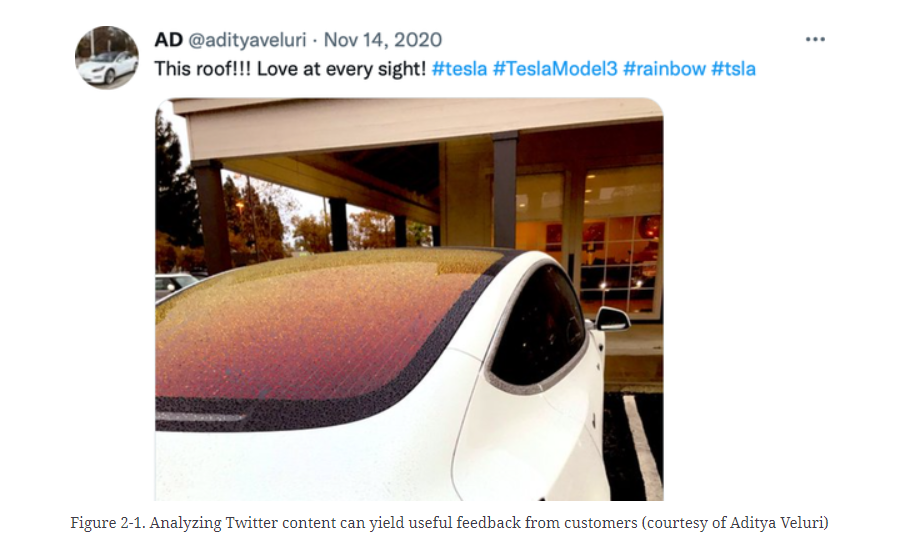

Now imagine that you are a data scientist who needs to build a system that can automatically identify emotional states such as “anger” or “joy” that people express about your company’s product on Twitter. In this chapter, we’ll tackle this task using a variant of BERT called DistilBERT.1 The main advantage of this model is that it achieves comparable performance to BERT, while being significantly smaller and more efficient. This enables us to train a classifier in a few minutes, and if you want to train a larger BERT model you can simply change the checkpoint of the pretrained model. A checkpoint corresponds to the set of weights that are loaded into a given transformer architecture.

This will also be our first encounter with three of the core libraries from the Hugging Face ecosystem:  Datasets, Tokenizers, and Transformers. As shown in Figure 2-2, these libraries will allow us to quickly go from raw text to a fine-tuned model that can be used for inference on new tweets. So, in the spirit of Optimus Prime, let’s dive in, “transform, and roll out!”2

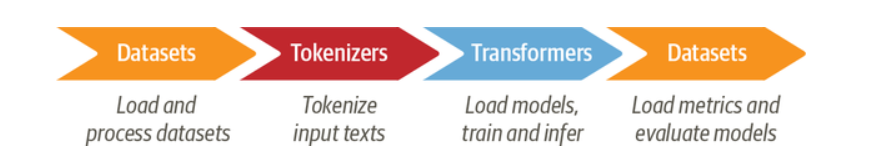

Figure 2-2. A typical pipeline for training transformer models with the Datasets, Tokenizers, and Transformers

#The Dataset
To build our emotion detector we’ll use a great dataset from an article that explored how emotions are represented in English Twitter messages.3 Unlike most sentiment analysis datasets that involve just “positive” and “negative” polarities, this dataset contains six basic emotions: anger, disgust, fear, joy, sadness, and surprise. Given a tweet, our task will be to train a model that can classify it into one of these emotions.

##A First Look at Hugging Face Datasets
We will use Datasets to download the data from the Hugging Face Hub. We can use the list_datasets() function to see what datasets are available on the Hub:

In [1]:
!pip install datasets --upgrade

     |████████████████████████████████| 311 kB 7.9 MB/s 
     |████████████████████████████████| 134 kB 71.1 MB/s 
     |████████████████████████████████| 1.1 MB 64.4 MB/s 
     |████████████████████████████████| 67 kB 7.7 MB/s 
     |████████████████████████████████| 212 kB 65.6 MB/s 
     |████████████████████████████████| 94 kB 4.5 MB/s 
     |████████████████████████████████| 144 kB 50.3 MB/s 
     |████████████████████████████████| 271 kB 77.0 MB/s 


In [2]:
from datasets import list_datasets

all_datasets = list_datasets()
print(f"There are {len(all_datasets)} datasets currently available on the Hub")
print(f"The first 10 are: {all_datasets[:10]}")

There are 3290 datasets currently available on the Hub
The first 10 are: ['assin', 'ar_res_reviews', 'ambig_qa', 'bianet', 'ag_news', 'ajgt_twitter_ar', 'aeslc', 'bc2gm_corpus', 'air_dialogue', 'acronym_identification']


We see that each dataset is given a name, so let’s load the emotion dataset with the load_dataset() function:

In [3]:
from datasets import load_dataset

emotions = load_dataset("emotion")

Downloading:   0%|          | 0.00/1.66k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.61k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [5]:
train_ds = emotions["train"]

In [6]:
emotions["train"][:]

{'label': [0,
  0,
  3,
  2,
  3,
  0,
  5,
  4,
  1,
  2,
  0,
  1,
  3,
  0,
  1,
  1,
  0,
  0,
  0,
  4,
  3,
  4,
  1,
  1,
  3,
  0,
  0,
  0,
  3,
  1,
  1,
  4,
  5,
  3,
  1,
  1,
  1,
  1,
  3,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  2,
  1,
  3,
  1,
  0,
  3,
  4,
  1,
  0,
  0,
  5,
  1,
  1,
  1,
  2,
  4,
  4,
  5,
  3,
  3,
  0,
  2,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  3,
  0,
  3,
  3,
  3,
  1,
  1,
  1,
  1,
  0,
  4,
  2,
  3,
  0,
  3,
  2,
  0,
  1,
  1,
  0,
  3,
  2,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  2,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  4,
  4,
  4,
  0,
  2,
  1,
  1,
  2,
  4,
  5,
  1,
  1,
  1,
  1,
  3,
  4,
  1,
  3,
  2,
  3,
  0,
  1,
  0,
  3,
  1,
  5,
  0,
  3,
  3,
  0,
  1,
  4,
  1,
  1,
  4,
  0,
  5,
  5,
  1,
  3,
  4,
  3,
  0,
  3,
  0,
  4,
  0,
  1,
  5,
  4,
  1,
  3,
  1,
  3,
  1,
  4,
  4,
  0,
  1,
  1,
  0,
  5,
  1,
  4,
  1,
  0,
  1,
  1,
  1,
  4,
  1,
  5,
  1,
  3,
  0,
  0,
  1,
  3,
 

In [7]:
emotions["train"][:5]

{'label': [0, 0, 3, 2, 3],
 'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy']}

In [8]:
emotions["validation"][:]

{'label': [0,
  0,
  2,
  3,
  1,
  1,
  1,
  1,
  1,
  0,
  3,
  1,
  0,
  0,
  0,
  1,
  0,
  3,
  2,
  1,
  4,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  2,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  3,
  1,
  2,
  0,
  0,
  0,
  3,
  0,
  0,
  3,
  2,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  3,
  0,
  0,
  2,
  2,
  1,
  0,
  1,
  1,
  0,
  0,
  2,
  4,
  0,
  1,
  1,
  1,
  4,
  2,
  1,
  0,
  3,
  0,
  0,
  0,
  3,
  3,
  0,
  3,
  2,
  1,
  1,
  2,
  3,
  3,
  1,
  2,
  3,
  4,
  1,
  3,
  3,
  2,
  0,
  3,
  2,
  2,
  0,
  1,
  3,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  3,
  3,
  3,
  1,
  0,
  2,
  4,
  4,
  1,
  0,
  4,
  0,
  0,
  1,
  3,
  0,
  4,
  4,
  2,
  1,
  1,
  0,
  1,
  0,
  1,
  3,
  5,
  2,
  4,
  2,
  0,
  2,
  1,
  4,
  3,
  1,
  3,
  1,
  5,
  3,
  2,
  0,
  4,
  3,
  1,
  0,
  1,
  5,
  1,
  4,
  4,
  0,
  0,
  5,
  0,
  1,
  4,
  1,
  4,
  0,
  2,
  2,
  0,
  3,
  3,
  1,
  1,
  3,
  3,
  0,
  0,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  4,
  1,
 

In [9]:
emotions["test"][:]

{'label': [0,
  0,
  0,
  1,
  0,
  4,
  3,
  1,
  1,
  3,
  4,
  0,
  4,
  1,
  2,
  0,
  1,
  0,
  3,
  1,
  0,
  1,
  1,
  0,
  0,
  4,
  3,
  0,
  4,
  3,
  4,
  3,
  0,
  3,
  0,
  1,
  1,
  0,
  1,
  1,
  3,
  0,
  1,
  0,
  1,
  3,
  1,
  1,
  4,
  4,
  0,
  4,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  3,
  0,
  0,
  1,
  1,
  0,
  5,
  0,
  3,
  4,
  5,
  1,
  2,
  5,
  1,
  2,
  3,
  1,
  0,
  1,
  2,
  1,
  3,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  4,
  3,
  4,
  3,
  3,
  2,
  0,
  3,
  0,
  0,
  0,
  0,
  4,
  3,
  3,
  1,
  1,
  4,
  0,
  1,
  2,
  4,
  1,
  0,
  1,
  1,
  4,
  0,
  1,
  0,
  1,
  0,
  3,
  0,
  2,
  0,
  4,
  0,
  0,
  1,
  2,
  0,
  3,
  3,
  1,
  4,
  3,
  0,
  1,
  1,
  0,
  4,
  1,
  1,
  0,
  1,
  4,
  4,
  2,
  0,
  2,
  5,
  0,
  1,
  0,
  1,
  1,
  3,
  0,
  3,
  3,
  1,
  4,
  4,
  1,
  2,
  2,
  2,
  0,
  2,
  3,
  1,
  1,
  0,
  3,
  1,
  1,
  0,
  0,
  4,
  1,
  0,
  2,
  4,
  0,
  1,
  1,
  4,
  3,
  1,
  0,
  1,
  3,
  0,
  0,
  4,
  4,
 

In [10]:
len(train_ds)

16000

###Accessing the single example by its index

In [11]:
emotions["train"][0]

{'label': 0, 'text': 'i didnt feel humiliated'}

Here we see that a single row is represented as a dictionary, where the keys correspond to the column names:

In [12]:
emotions["train"][0]["label"]

0

In [13]:
emotions["train"][0]["text"]

'i didnt feel humiliated'

In [14]:
train_ds.column_names

['text', 'label']

and the values are the tweet and the emotion. This reflects the fact that nlpt_pin01 Datasets is based on Apache Arrow, which defines a typed columnar format that is more memory efficient than native Python. We can see what data types are being used under the hood by accessing the features attribute of a Dataset object:

In [15]:
train_ds.features

{'label': ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None),
 'text': Value(dtype='string', id=None)}

In this case, the data type of the text column is string, while the label column is a special ClassLabel object that contains information about the class names and their mapping to integers. We can also access several rows with a slice:

In [16]:
print(train_ds[:5])

{'text': ['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy'], 'label': [0, 0, 3, 2, 3]}


Note that in this case, the dictionary values are now lists instead of individual elements. We can also get the full column by name:

In [17]:
print(train_ds["text"][:5])

['i didnt feel humiliated', 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake', 'im grabbing a minute to post i feel greedy wrong', 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property', 'i am feeling grouchy']


Now that we’ve seen how to load and inspect data with nlpt_pin01 Datasets, let’s do a few checks about the content of our tweets.

##WHAT IF MY DATASET IS NOT ON THE HUB?
We’ll be using the Hugging Face Hub to download datasets for most of the examples in this book. But in many cases, you’ll find yourself working with data that is either stored on your laptop or on a remote server in your organization. Datasets provides several loading scripts to handle local and remote datasets. Examples for the most common data formats are shown in Table 2-1.

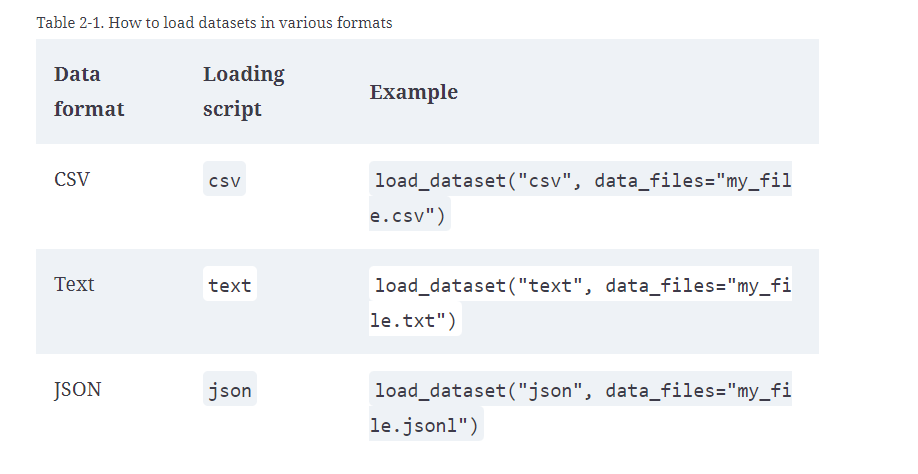

As you can see, for each data format, we just need to pass the relevant loading script to the load_dataset() function, along with a data_files argument that specifies the path or URL to one or more files. For example, the source files for the emotion dataset are actually hosted on Dropbox, so an alternative way to load the dataset is to first download one of the splits:

In [18]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt"
!wget {dataset_url}

--2022-03-05 05:47:39--  https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/1pzkadrvffbqw6o/train.txt [following]
--2022-03-05 05:47:39--  https://www.dropbox.com/s/raw/1pzkadrvffbqw6o/train.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uceeba66f9d8c96439ef4563f2bd.dl.dropboxusercontent.com/cd/0/inline/Bg2AKB9Oyo_QayklJ59TkN-gFNaQeDBiUvFmgVWGqGWoocBqYmREuD6T3e8DB4iWsivY8kd4RMSLI3Qv95UMwatK89hKqMZNdM8CWQ_X9BomTlWrCVzZf8KVo9V7CuYBtfse_eWHiTvyaMp6y4rQBpN3/file# [following]
--2022-03-05 05:47:39--  https://uceeba66f9d8c96439ef4563f2bd.dl.dropboxusercontent.com/cd/0/inline/Bg2AKB9Oyo_QayklJ59TkN-gFNaQeDBiUvFmgVWGqGWoocBqYmREuD6T3e8DB4iWsivY8kd4RMSLI3Qv95UMwatK89hKqMZNdM8

If you’re wondering why there’s a ! character in the preceding shell command, that’s because we’re running the commands in a Jupyter notebook. Simply remove the prefix if you want to download and unzip the dataset within a terminal. Now, if we peek at the first row of the train.txt file:

In [19]:
!head -n 1 train.txt

i didnt feel humiliated;sadness


In [20]:
!head -n 100 train.txt

i didnt feel humiliated;sadness
i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake;sadness
im grabbing a minute to post i feel greedy wrong;anger
i am ever feeling nostalgic about the fireplace i will know that it is still on the property;love
i am feeling grouchy;anger
ive been feeling a little burdened lately wasnt sure why that was;sadness
ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny;surprise
i feel as confused about life as a teenager or as jaded as a year old man;fear
i have been with petronas for years i feel that petronas has performed well and made a huge profit;joy
i feel romantic too;love
i feel like i have to make the suffering i m seeing mean something;sadness
i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter;joy
i think it s the easiest time of year to feel dissatisfied;anger
i fee

In [21]:
!head -n -100 train.txt

Streaming output truncated to the last 5000 lines.
i feel helpless to make any real difference;sadness
i feel helpless and scared and all of these things i cant describe and i never thought of myself as a control freak but im recognizing that feeding my feelings is my way to control something in the midst of chaos;sadness
im going to be after the birth of this baby feels shaky;fear
i left feeling too dull to come up with ideas;sadness
i love the feeling of carrying him in my arms and looking at his sweet sleeping face;joy
i feel a strange sense of achievement that i have scraped every nook and cranny of the shells for juicy morsels;fear
i always feel so flattered when another amazing blogger asks me to share a little of world on their blog so here it goes;surprise
i would feel disheartened so i would then go and do cardio for another hour to achieve calories;sadness
i was feeling a bit shaky and a bit off centre but i think most of that was worrying about things out of my control;fear


In [22]:
!head -n -2 train.txt

Streaming output truncated to the last 5000 lines.
i also like to listen to jazz whilst painting it makes me feel more artistic and ambitious actually look to the rainbow;joy
i cant really describe the feeling that i have except to say that i am incredibly burdened;sadness
i feel exhausted just by writing that;sadness
im feeling a little regretful but itll pass because thats what happens with regret;sadness
i feel stressed frequently;anger
i can feel the awkwardness and that weird kind of tension;fear
i know i just ended a very big giveaway here on the muse but im still feeling quite generous;love
i love getting out the decorations and feeling festive i am happy to put them away;joy
i point these things out so as to make clear that i went into this film with the best intentions but left feeling irritated confused and wore out;anger
i feel so heartbroken and confused and just blah blah blah;sadness
i guess you could say i am a loner but i feel more lonely in a crowed room with boring pe

###we can see that here are no column headers and each tweet and emotion are separated by a semicolon. Nevertheless, this is quite similar to a CSV file, so we can load the dataset locally by using the csv script and pointing the data_files argument to the train.txt file:

In [23]:
emotions_local = load_dataset("csv", data_files="train.txt", sep=";",
                              names=["text", "label"])

Using custom data configuration default-d3f8f0f267edf78f


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-d3f8f0f267edf78f/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

Here we’ve also specified the type of delimiter and the names of the columns. An even simpler approach is to just point the data_files argument to the URL itself:

In [24]:
dataset_url = "https://www.dropbox.com/s/1pzkadrvffbqw6o/train.txt?dl=1"
emotions_remote = load_dataset("csv", data_files=dataset_url, sep=";",
                               names=["text", "label"])

Using custom data configuration default-a70389bc6b0a03f2


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-a70389bc6b0a03f2/0.0.0/6b9057d9e23d9d8a2f05b985917a0da84d70c5dae3d22ddd8a3f22fb01c69d9e. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

which will automatically download and cache the dataset for you. As you can see, the load_dataset() function is very versatile. We recommend checking out the Datasets documentation to get a complete overview.

#From Datasets to DataFrames
Although nlpt_pin01 Datasets provides a lot of low-level functionality to slice and dice our data, it is often convenient to convert a Dataset object to a Pandas DataFrame so we can access high-level APIs for data visualization. To enable the conversion, nlpt_pin01 Datasets provides a set_format() method that allows us to change the output format of the Dataset. Note that this does not change the underlying data format (which is an Arrow table), and you can switch to another format later if needed:

In [25]:
import pandas as pd

emotions.set_format(type="pandas")
df = emotions["train"][:]
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


As you can see, the column headers have been preserved and the first few rows match our previous views of the data. However, the labels are represented as integers, so let’s use the int2str() method of the label feature to create a new column in our DataFrame with the corresponding label names:

In [26]:
df["label"]

0        0
1        0
2        3
3        2
4        3
        ..
15995    0
15996    0
15997    1
15998    3
15999    0
Name: label, Length: 16000, dtype: int64

In [27]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

In [28]:
df["label"].apply(label_int2str)

0        sadness
1        sadness
2          anger
3           love
4          anger
          ...   
15995    sadness
15996    sadness
15997        joy
15998      anger
15999    sadness
Name: label, Length: 16000, dtype: object

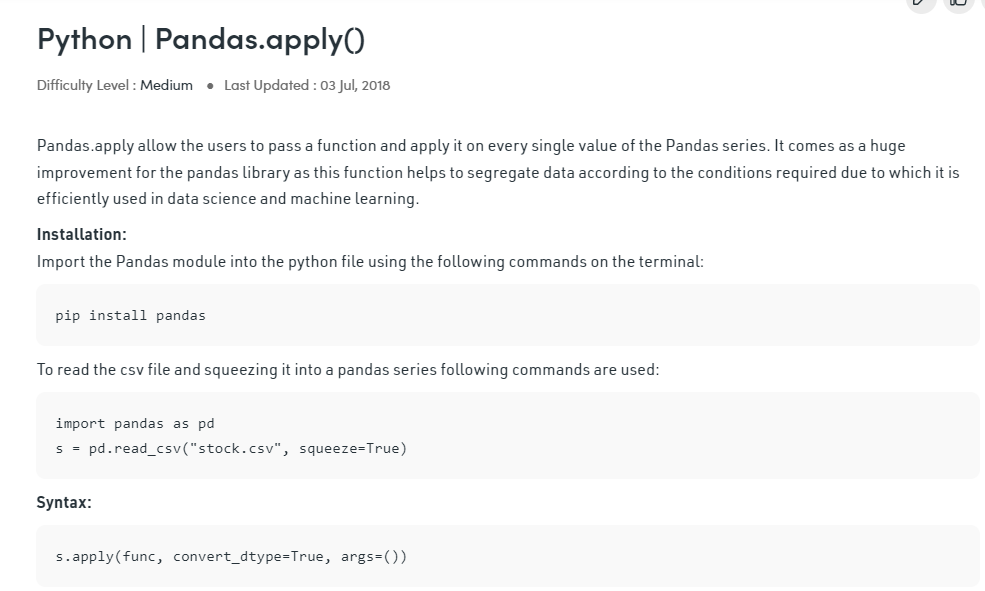

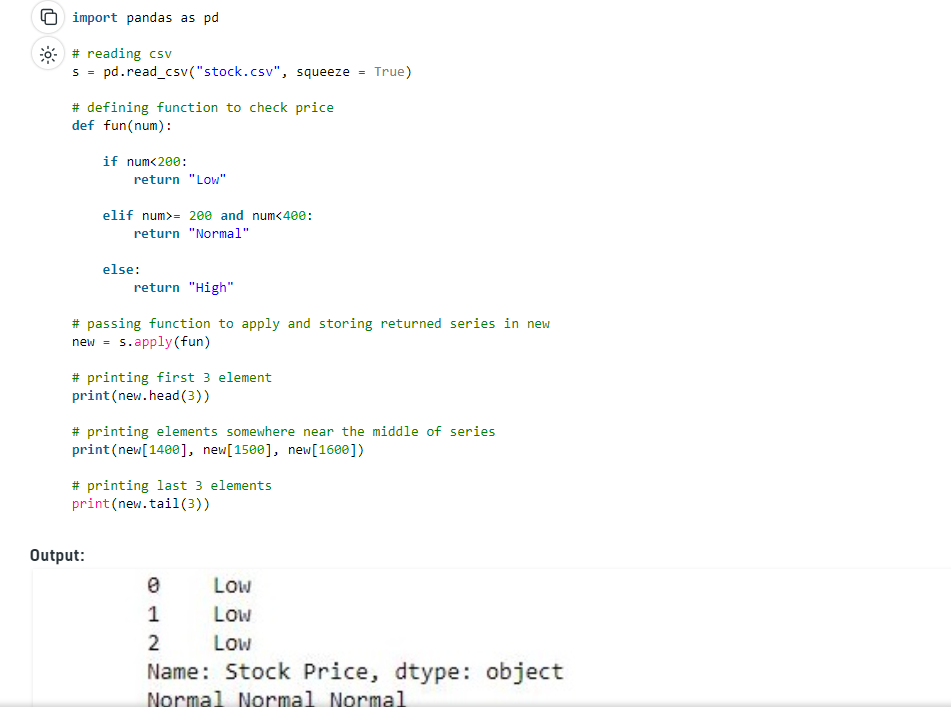

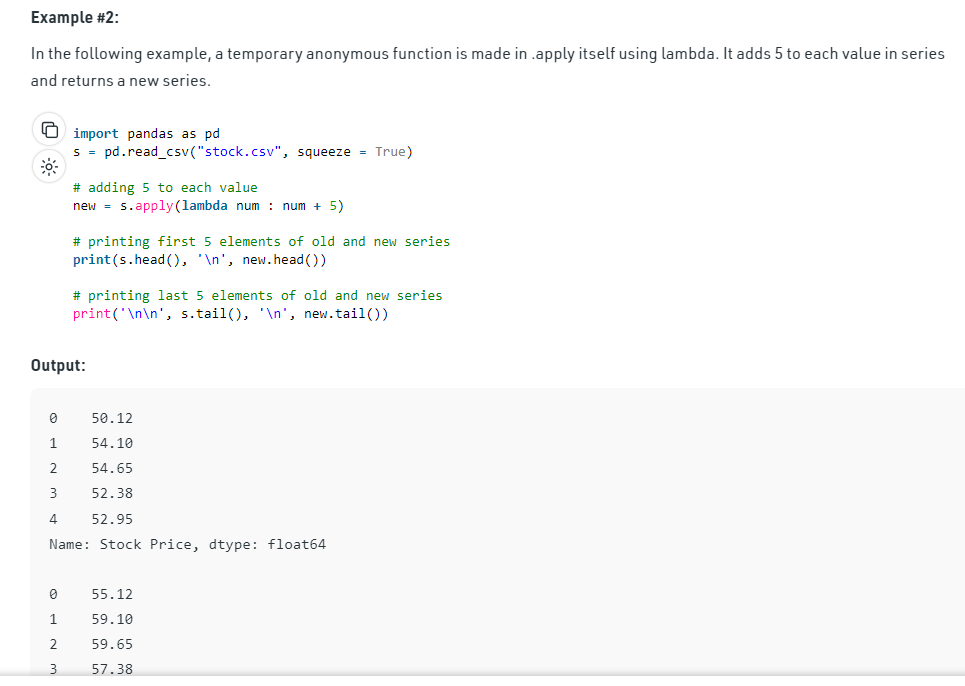

In [29]:
def label_int2str(row):
    return emotions["train"].features["label"].int2str(row)

df["label_name"] = df["label"].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [30]:
emotions["train"].features["label"]

ClassLabel(num_classes=6, names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], names_file=None, id=None)

In [31]:
emotions["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

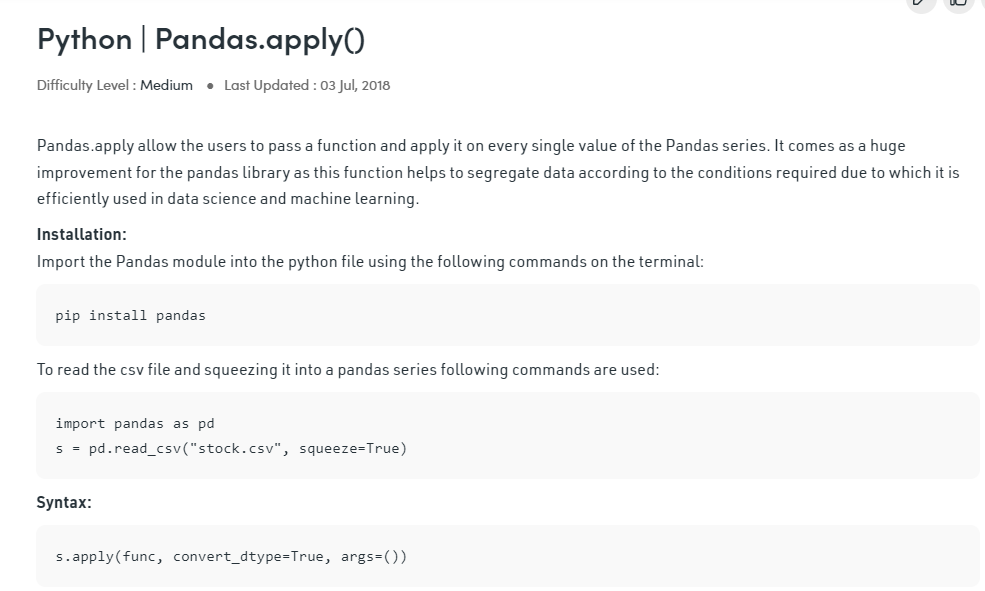

Before diving into building a classifier, let’s take a closer look at the dataset. As Andrej Karpathy notes in his famous blog post “A Recipe for Training Neural Networks”, becoming “one with the data” is an essential step for training great models!

#Looking at the Class Distribution
Whenever you are working on text classification problems, it is a good idea to examine the distribution of examples across the classes. A dataset with a skewed class distribution might require a different treatment in terms of the training loss and evaluation metrics than a balanced one.

With Pandas and Matplotlib, we can quickly visualize the class distribution as follows:

In [32]:
import matplotlib.pyplot as plt
df["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

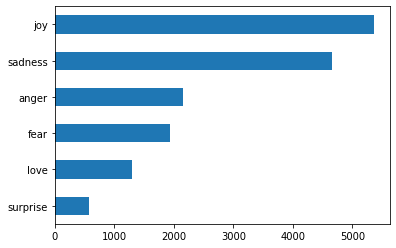

In [33]:
df["label_name"].value_counts(ascending=True).plot.barh()

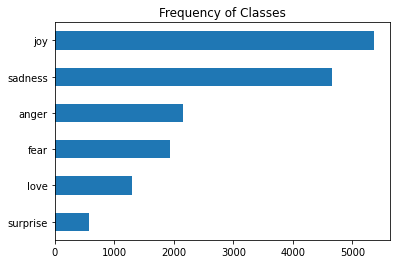

In [34]:
import matplotlib.pyplot as plt

df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Frequency of Classes")
plt.show()

In this case, we can see that the dataset is heavily imbalanced; the joy and sadness classes appear frequently, whereas love and surprise are about 5–10 times rarer. There are several ways to deal with imbalanced data, including:

>Randomly oversample the minority class.

>Randomly undersample the majority class.

>Gather more labeled data from the underrepresented classes.

To keep things simple in this chapter, we’ll work with the raw, unbalanced class frequencies. If you want to learn more about these sampling techniques, we recommend checking out the Imbalanced-learn library.

>**Just make sure that you don’t apply sampling methods before creating your train/test splits, or you’ll get plenty of leakage between them!**

Now that we’ve looked at the classes, let’s take a look at the tweets themselves.

#How Long Are Our Tweets?
Transformer models have a maximum input sequence length that is referred to as the maximum context size. For applications using DistilBERT, the maximum context size is 512 tokens, which amounts to a few paragraphs of text. As we’ll see in the next section, a token is an atomic piece of text; for now, we’ll treat a token as a single word. We can get a rough estimate of tweet lengths per emotion by looking at the distribution of words per tweet:

In [35]:
df["text"]

0                                  i didnt feel humiliated
1        i can go from feeling so hopeless to so damned...
2         im grabbing a minute to post i feel greedy wrong
3        i am ever feeling nostalgic about the fireplac...
4                                     i am feeling grouchy
                               ...                        
15995    i just had a very brief time in the beanbag an...
15996    i am now turning and i feel pathetic that i am...
15997                       i feel strong and good overall
15998    i feel like this was such a rude comment and i...
15999    i know a lot but i feel so stupid because i ca...
Name: text, Length: 16000, dtype: object

In [36]:
df["text"].dtype

dtype('O')

In [37]:
df["text"].str

In [38]:
df["text"].str.split()

0                             [i, didnt, feel, humiliated]
1        [i, can, go, from, feeling, so, hopeless, to, ...
2        [im, grabbing, a, minute, to, post, i, feel, g...
3        [i, am, ever, feeling, nostalgic, about, the, ...
4                                [i, am, feeling, grouchy]
                               ...                        
15995    [i, just, had, a, very, brief, time, in, the, ...
15996    [i, am, now, turning, and, i, feel, pathetic, ...
15997                [i, feel, strong, and, good, overall]
15998    [i, feel, like, this, was, such, a, rude, comm...
15999    [i, know, a, lot, but, i, feel, so, stupid, be...
Name: text, Length: 16000, dtype: object

In [39]:
df["text"].str.split().apply(len)

0         4
1        21
2        10
3        18
4         4
         ..
15995    24
15996    20
15997     6
15998    14
15999    15
Name: text, Length: 16000, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


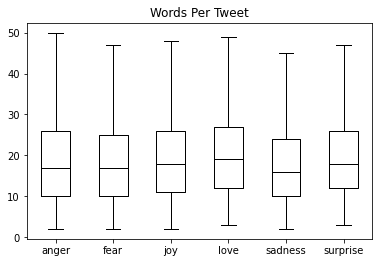

In [40]:
df["Words Per Tweet"] = df["text"].str.split().apply(len)
df.boxplot("Words Per Tweet", by="label_name", grid=False,
          showfliers=False, color="black")
plt.suptitle("")
plt.xlabel("")
plt.show()

From the plot we see that for each emotion, most tweets are around 15 words long and the longest tweets are well below DistilBERT’s maximum context size. Texts that are longer than a model’s context size need to be truncated, which can lead to a loss in performance if the truncated text contains crucial information; in this case, it looks like that won’t be an issue.

Let’s now figure out how we can convert these raw texts into a format suitable for ​nlpt_pin01⁠ Transformers! While we’re at it, let’s also reset the output format of our dataset since we don’t need the DataFrame format anymore:

In [41]:
emotions.reset_format()


#From Text to Tokens
Transformer models like DistilBERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors. Tokenization is the step of breaking down a string into the atomic units used in the model. There are several tokenization strategies one can adopt, and the optimal splitting of words into subunits is usually learned from the corpus. Before looking at the tokenizer used for DistilBERT, let’s consider two extreme cases: character and word tokenization.

###Character Tokenization
The simplest tokenization scheme is to feed each character individually to the model. In Python, str objects are really arrays under the hood, which allows us to quickly implement character-level tokenization with just one line of code:

In [42]:
text = "Tokenizing text is a core task of NLP."
tokenized_text = list(text)
print(tokenized_text)

['T', 'o', 'k', 'e', 'n', 'i', 'z', 'i', 'n', 'g', ' ', 't', 'e', 'x', 't', ' ', 'i', 's', ' ', 'a', ' ', 'c', 'o', 'r', 'e', ' ', 't', 'a', 's', 'k', ' ', 'o', 'f', ' ', 'N', 'L', 'P', '.']


This is a good start, but we’re not done yet. Our model expects each character to be converted to an integer, a process sometimes called numericalization. One simple way to do this is by encoding each unique token (which are characters in this case) with a unique integer:

In [43]:
token2idx = {ch: idx for idx, ch in enumerate(sorted(set(tokenized_text)))}
print(token2idx)

{' ': 0, '.': 1, 'L': 2, 'N': 3, 'P': 4, 'T': 5, 'a': 6, 'c': 7, 'e': 8, 'f': 9, 'g': 10, 'i': 11, 'k': 12, 'n': 13, 'o': 14, 'r': 15, 's': 16, 't': 17, 'x': 18, 'z': 19}


This gives us a mapping from each character in our vocabulary to a unique integer. We can now use token2idx to transform the tokenized text to a list of integers:

In [44]:
input_ids = [token2idx[token] for token in tokenized_text]
print(input_ids)

[5, 14, 12, 8, 13, 11, 19, 11, 13, 10, 0, 17, 8, 18, 17, 0, 11, 16, 0, 6, 0, 7, 14, 15, 8, 0, 17, 6, 16, 12, 0, 14, 9, 0, 3, 2, 4, 1]


Each token has now been mapped to a unique numerical identifier (hence the name input_ids). The last step is to convert input_ids to a 2D tensor of one-hot vectors. One-hot vectors are frequently used in machine learning to encode categorical data, which can be either ordinal or nominal. For example, suppose we wanted to encode the names of characters in the Transformers TV series. One way to do this would be to map each name to a unique ID, as follows:

In [45]:
categorical_df = pd.DataFrame(
    {"Name": ["Bumblebee", "Optimus Prime", "Megatron"], "Label ID": [0,1,2]})
categorical_df

,Name,Label ID
0,Bumblebee,0
1,Optimus Prime,1
2,Megatron,2


The problem with this approach is that it creates a fictitious ordering between the names, and neural networks are really good at learning these kinds of relationships. So instead, we can create a new column for each category and assign a 1 where the category is true, and a 0 otherwise. In Pandas, this can be implemented with the get_dummies() function as follows:

In [46]:
pd.get_dummies(categorical_df["Name"])

,Bumblebee,Megatron,Optimus Prime
0,1,0,0
1,0,0,1
2,0,1,0


The rows of this DataFrame are the one-hot vectors, which have a single “hot” entry with a 1 and 0s everywhere else. Now, looking at our input_ids, we have a similar problem: the elements create an ordinal scale. This means that adding or subtracting two IDs is a meaningless operation, since the result is a new ID that represents another random token.

On the other hand, the result of adding two one-hot encodings can easily be interpreted: the two entries that are “hot” indicate that the corresponding tokens co-occur. We can create the one-hot encodings in PyTorch by converting input_ids to a tensor and applying the one_hot() function as follows:

In [47]:
import torch
import torch.nn.functional as F

input_ids = torch.tensor(input_ids)
one_hot_encodings = F.one_hot(input_ids, num_classes=len(token2idx))
one_hot_encodings.shape

torch.Size([38, 20])

For each of the 38 input tokens we now have a one-hot vector with 20 dimensions, since our vocabulary consists of 20 unique characters.

#WARNING
It’s important to always set num_classes in the one_hot() function because otherwise the one-hot vectors may end up being shorter than the length of the vocabulary (and need to be padded with zeros manually). In TensorFlow, the equivalent function is tf.one_hot(), where the depth argument plays the role of num_classes.

By examining the first vector, we can verify that a 1 appears in the location indicated by input_ids[0]:

In [48]:
print(f"Token: {tokenized_text[0]}")
print(f"Tensor index: {input_ids[0]}")
print(f"One-hot: {one_hot_encodings[0]}")

Token: T
Tensor index: 5
One-hot: tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])


From our simple example we can see that character-level tokenization ignores any structure in the text and treats the whole string as a stream of characters. Although this helps deal with misspellings and rare words, the main drawback is that linguistic structures such as words need to be learned from the data. This requires significant compute, memory, and data. For this reason, character tokenization is rarely used in practice. Instead, some structure of the text is preserved during the tokenization step. Word tokenization is a straightforward approach to achieve this, so let’s take a look at how it works.

#Word Tokenization
Instead of splitting the text into characters, we can split it into words and map each word to an integer. Using words from the outset enables the model to skip the step of learning words from characters, and thereby reduces the complexity of the training process.

One simple class of word tokenizers uses whitespace to tokenize the text. We can do this by applying Python’s split() function directly on the raw text (just like we did to measure the tweet lengths):

In [49]:
tokenized_text = text.split()
print(tokenized_text)

['Tokenizing', 'text', 'is', 'a', 'core', 'task', 'of', 'NLP.']


From here we can take the same steps we took for the character tokenizer to map each word to an ID. However, we can already see one potential problem with this tokenization scheme: punctuation is not accounted for, so NLP. is treated as a single token. Given that words can include declinations, conjugations, or misspellings, the size of the vocabulary can easily grow into the millions!

###NOTE
**Some word tokenizers have extra rules for punctuation. One can also apply stemming or lemmatization, which normalizes words to their stem (e.g., “great”, “greater”, and “greatest” all become “great”), at the expense of losing some information in the text.**

Having a large vocabulary is a problem because it requires neural networks to have an enormous number of parameters. To illustrate this, suppose we have 1 million unique words and want to compress the 1-million-dimensional input vectors to 1-thousand-dimensional vectors in the first layer of our neural network. This is a standard step in most NLP architectures, and the resulting weight matrix of this first layer would contain 1 million × 1 thousand = 1 billion weights. This is already comparable to the largest GPT-2 model,4 which has around 1.5 billion parameters in total!

Naturally, we want to avoid being so wasteful with our model parameters since models are expensive to train, and larger models are more difficult to maintain. A common approach is to limit the vocabulary and discard rare words by considering, say, the 100,000 most common words in the corpus. Words that are not part of the vocabulary are classified as “unknown” and mapped to a shared UNK token. This means that we lose some potentially important information in the process of word tokenization, since the model has no information about words associated with UNK.

Wouldn’t it be nice if there was a compromise between character and word tokenization that preserved all the input information and some of the input structure? There is: subword tokenization.

#Subword Tokenization
The basic idea behind subword tokenization is to combine the best aspects of character and word tokenization. On the one hand, we want to split rare words into smaller units to allow the model to deal with complex words and misspellings. On the other hand, we want to keep frequent words as unique entities so that we can keep the length of our inputs to a manageable size. The main distinguishing feature of subword tokenization (as well as word tokenization) is that it is learned from the pretraining corpus using a mix of statistical rules and algorithms.

There are several subword tokenization algorithms that are commonly used in NLP, but let’s start with WordPiece,5 which is used by the BERT and DistilBERT tokenizers. The easiest way to understand how WordPiece works is to see it in action. nlpt_pin01 Transformers provides a convenient AutoTokenizer class that allows you to quickly load the tokenizer associated with a pretrained model—we just call its from_pretrained() method, providing the ID of a model on the Hub or a local file path. Let’s start by loading the tokenizer for DistilBERT:

In [50]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 8.4 MB/s 
     |████████████████████████████████| 6.5 MB 57.0 MB/s 
     |████████████████████████████████| 596 kB 59.5 MB/s 
     |████████████████████████████████| 895 kB 62.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [51]:
from transformers import AutoTokenizer

model_ckpt = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

The AutoTokenizer class belongs to a larger set of “auto” classes whose job is to automatically retrieve the model’s configuration,pretrained weights, or vocabulary from the name of the checkpoint. This allows you to quickly switch between models, but if you wish to load the specific class manually you can do so as well. For example, we could have loaded the DistilBERT tokenizer as follows:

In [52]:
from transformers import DistilBertTokenizer

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(model_ckpt)

##NOTE
When you run the AutoTokenizer.from_pretrained() method for the first time you will see a progress bar that shows which parameters of the pretrained tokenizer are loaded from the Hugging Face Hub. When you run the code a second time, it will load the tokenizer from the cache, usually at ~/.cache/huggingface.

Let’s examine how this tokenizer works by feeding it our simple “Tokenizing text is a core task of NLP.” example text:

In [53]:
encoded_text = tokenizer(text)
print(encoded_text)

{'input_ids': [101, 19204, 6026, 3793, 2003, 1037, 4563, 4708, 1997, 17953, 2361, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


Just as with character tokenization, we can see that the words have been mapped to unique integers in the input_ids field. We’ll discuss the role of the attention_mask field in the next section. Now that we have the input_ids, we can convert them back into tokens by using the tokenizer’s convert_ids_to_tokens() method:

In [54]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'token', '##izing', 'text', 'is', 'a', 'core', 'task', 'of', 'nl', '##p', '.', '[SEP]']


We can observe three things here. First, some special [CLS] and [SEP] tokens have been added to the start and end of the sequence. These tokens differ from model to model, but their main role is to indicate the start and end of a sequence. Second, the tokens have each been lowercased, which is a feature of this particular checkpoint. Finally, we can see that “tokenizing” and “NLP” have been split into two tokens, which makes sense since they are not common words. The ## prefix in ##izing and ##p means that the preceding string is not whitespace; any token with this prefix should be merged with the previous token when you convert the tokens back to a string. The AutoTokenizer class has a convert_tokens_to_string() method for doing just that, so let’s apply it to our tokens:

In [55]:
print(tokenizer.convert_tokens_to_string(tokens))

[CLS] tokenizing text is a core task of nlp. [SEP]


The AutoTokenizer class also has several attributes that provide information about the tokenizer. For example, we can inspect the vocabulary size:

In [56]:
tokenizer.vocab_size

30522

and the corresponding model’s maximum context size:

In [57]:
tokenizer.model_max_length

512

Another interesting attribute to know about is the names of the fields that the model expects in its forward pass:

In [58]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

Now that we have a basic understanding of the tokenization process for a single string, let’s see how we can tokenize the whole dataset!

##WARNING
When using pretrained models, it is really important to make sure that you use the same tokenizer that the model was trained with. From the model’s perspective, switching the tokenizer is like shuffling the vocabulary. If everyone around you started swapping random words like “house” for “cat,” you’d have a hard time understanding what was going on too!

#Tokenizing the Whole Dataset
To tokenize the whole corpus, we’ll use the map() method of our DatasetDict object. We’ll encounter this method many times throughout this book, as it provides a convenient way to apply a processing function to each element in a dataset. As we’ll soon see, the map() method can also be used to create new rows and columns.

To get started, the first thing we need is a processing function to tokenize our examples with:

In [59]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

This function applies the tokenizer to a batch of examples; padding=True will pad the examples with zeros to the size of the longest one in a batch, and truncation=True will truncate the examples to the model’s maximum context size. To see tokenize() in action, let’s pass a batch of two examples from the training set:

In [60]:
print(tokenize(emotions["train"][:2]))

{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}


----Self-Analysis----

In [61]:
print(tokenize(emotions["train"][0]))

{'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1]}


In [62]:
emotions["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [63]:
emotions["train"]["text"]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy',
 'ive been feeling a little burdened lately wasnt sure why that was',
 'ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny',
 'i feel as confused about life as a teenager or as jaded as a year old man',
 'i have been with petronas for years i feel that petronas has performed well and made a huge profit',
 'i feel romantic too',
 'i feel like i have to make the suffering i m seeing mean something',
 'i do feel that running is a divine experience and that i can expect to have some type of spiritual encounter',
 'i think it s the easiest time of year to feel dissatisfied',
 'i feel low energy i m just thirst

In [64]:
emotions["train"][0]["text"]

'i didnt feel humiliated'

Here we can see the result of padding: the first element of input_ids is shorter than the second, so zeros have been added to that element to make them the same length. These zeros have a corresponding [PAD] token in the vocabulary, and the set of special tokens also includes the [CLS] and [SEP] tokens that we encountered earlier:

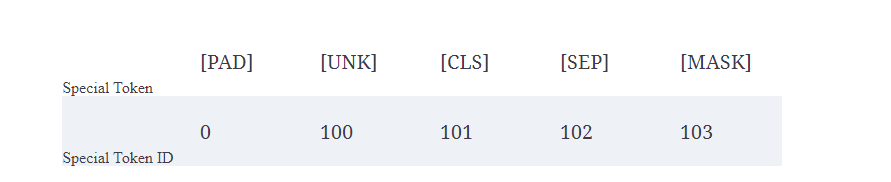

Also note that in addition to returning the encoded tweets as input_ids, the tokenizer returns a list of attention_mask arrays. This is because we do not want the model to get confused by the additional padding tokens: the attention mask allows the model to ignore the padded parts of the input. Figure 2-3 provides a visual explanation of how the input IDs and attention masks are padded.

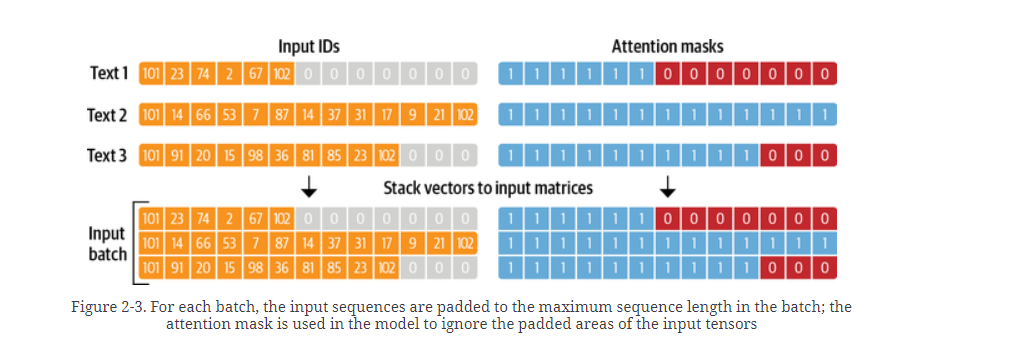

Once we’ve defined a processing function, we can apply it across all the splits in the corpus in a single line of code:

In [65]:
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

By default, the map() method operates individually on every example in the corpus, so setting batched=True will encode the tweets in batches. Because we’ve set batch_size=None, our tokenize() function will be applied on the full dataset as a single batch. This ensures that the input tensors and attention masks have the same shape globally, and we can see that this operation has added new input_ids and attention_mask columns to the dataset:

In [66]:
print(emotions_encoded["train"].column_names)

['text', 'label', 'input_ids', 'attention_mask']


#NOTE
In later chapters, we’ll see how data collators can be used to dynamically pad the tensors in each batch. Padding globally will come in handy in the next section, where we extract a feature matrix from the whole corpus.

#Training a Text Classifier
As discussed in Chapter 1, models like DistilBERT are pretrained to predict masked words in a sequence of text. However, we can’t use these language models directly for text classification; we need to modify them slightly. To understand what modifications are necessary, let’s take a look at the architecture of an encoder-based model like DistilBERT, which is depicted in Figure 2-4.



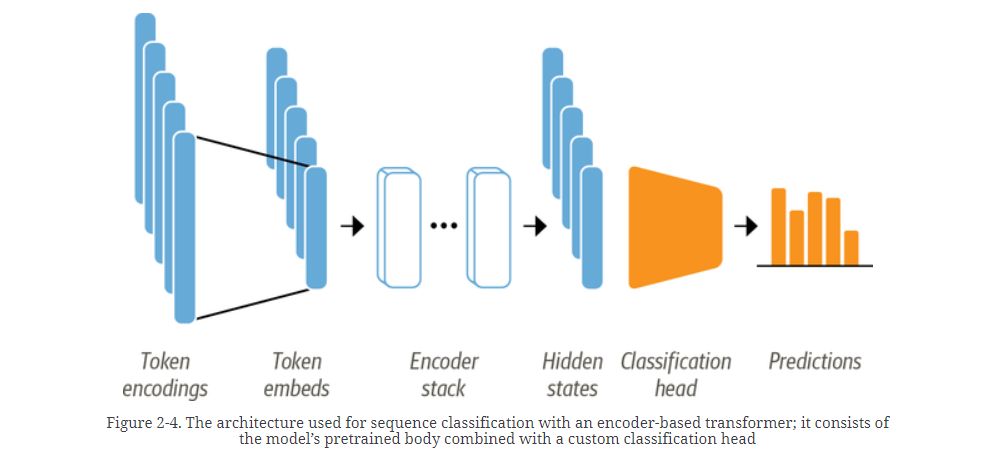

First, the text is tokenized and represented as one-hot vectors called token encodings. The size of the tokenizer vocabulary determines the dimension of the token encodings, and it usually consists of 20k–200k unique tokens. Next, these token encodings are converted to token embeddings, which are vectors living in a lower-dimensional space. The token embeddings are then passed through the encoder block layers to yield a hidden state for each input token. For the pretraining objective of language modeling,⁠6 each hidden state is fed to a layer that predicts the masked input tokens. For the classification task, we replace the language modeling layer with a classification layer.

##NOTE
In practice, PyTorch skips the step of creating one-hot vectors for token encodings because multiplying a matrix with a one-hot vector is the same as selecting a column from the matrix. This can be done directly by getting the column with the token ID from the matrix. We’ll see this in Chapter 3 when we use the nn.Embedding class.

We have two options to train such a model on our Twitter dataset:

#Feature extraction
We use the hidden states as features and just train a classifier on them, without modifying the pretrained model.

#Fine-tuning
We train the whole model end-to-end, which also updates the parameters of the pretrained model.

In the following sections we explore both options for DistilBERT and examine their trade-offs.

#Transformers as Feature Extractors
Using a transformer as a feature extractor is fairly simple. As shown in Figure 2-5, we freeze the body’s weights during training and use the hidden states as features for the classifier. The advantage of this approach is that we can quickly train a small or shallow model. Such a model could be a neural classification layer or a method that does not rely on gradients, such as a random forest. This method is especially convenient if GPUs are unavailable, since the hidden states only need to be precomputed once.

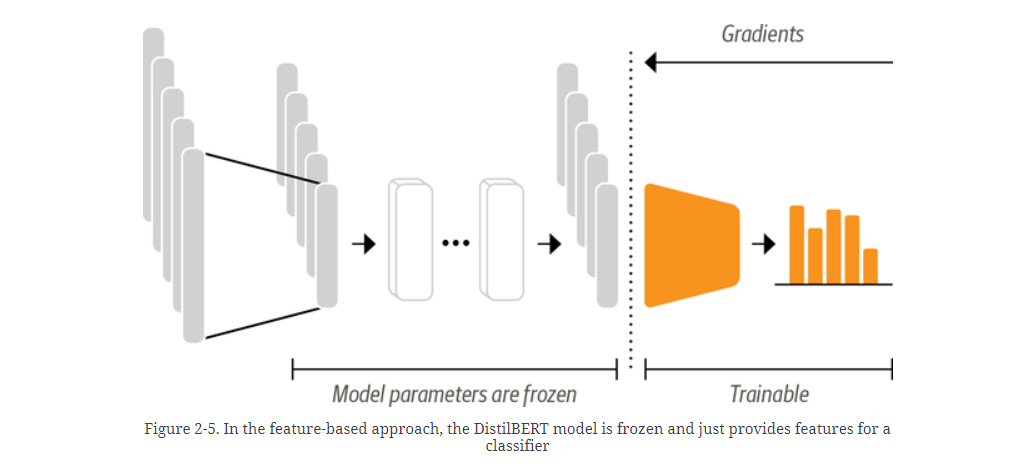

#Using pretrained models
We will use another convenient auto class from nlpt_pin01 Transformers called AutoModel. Similar to the AutoTokenizer class, AutoModel has a from_pretrained() method to load the weights of a pretrained model. Let’s use this method to load the DistilBERT checkpoint:

In [67]:
from transformers import AutoModel

model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_ckpt).to(device)

Downloading:   0%|          | 0.00/256M [00:00<?, ?B/s]

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Here we’ve used PyTorch to check whether a GPU is available or not, and then chained the PyTorch nn.Module.to() method to the model loader. This ensures that the model will run on the GPU if we have one. If not, the model will run on the CPU, which can be considerably slower.

The AutoModel class converts the token encodings to embeddings, and then feeds them through the encoder stack to return the hidden states. Let’s take a look at how we can extract these states from our corpus.

#INTEROPERABILITY BETWEEN FRAMEWORKS
Although the code in this book is mostly written in PyTorch, nlpt_pin01 Transformers provides tight interoperability with TensorFlow and JAX. This means that you only need to change a few lines of code to load a pretrained model in your favorite deep learning framework! For example, we can load DistilBERT in TensorFlow by using the TFAutoModel class as follows:

In [68]:
from transformers import TFAutoModel

tf_model = TFAutoModel.from_pretrained(model_ckpt)

Downloading:   0%|          | 0.00/347M [00:00<?, ?B/s]

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_layer_norm', 'activation_13', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


This interoperability is especially useful when a model is only released in one framework, but you’d like to use it in another. For example, the XLM-RoBERTa model that we’ll encounter in Chapter 4 only has PyTorch weights, so if you try to load it in TensorFlow as we did before:

In [69]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base")

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

OSError: ignored

you’ll get an error. In these cases, you can specify a from_pt=True argument to the TfAutoModel.from_pretrained() function, and the library will automatically download and convert the PyTorch weights for you:

In [70]:
tf_xlmr = TFAutoModel.from_pretrained("xlm-roberta-base", from_pt=True)

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFXLMRobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.bias']
- This IS expected if you are initializing TFXLMRobertaModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLMRobertaModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFXLMRobertaModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLMRobertaModel for predictions without further training.


As you can see, it is very simple to switch between frameworks in nlpt_pin01 Transformers! In most cases, you can just add a “TF” prefix to the classes and you’ll get the equivalent TensorFlow 2.0 classes. When we use the "pt" string (e.g., in the following section), which is short for PyTorch, just replace it with "tf", which is short for TensorFlow.

#Extracting the last hidden states
To warm up, let’s retrieve the last hidden states for a single string. The first thing we need to do is encode the string and convert the tokens to PyTorch tensors. This can be done by providing the return_tensors="pt" argument to the tokenizer as follows:

In [71]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [72]:
inputs

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]])}

#Extracting the last hidden states
To warm up, let’s retrieve the last hidden states for a single string. The first thing we need to do is encode the string and convert the tokens to PyTorch tensors. This can be done by providing the return_tensors="pt" argument to the tokenizer as follows:

In [73]:
text = "this is a test"
inputs = tokenizer(text, return_tensors="pt")
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [74]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [75]:
for k,v in inputs.items():
  print(k)
  print(v)

input_ids
tensor([[ 101, 2023, 2003, 1037, 3231,  102]])
attention_mask
tensor([[1, 1, 1, 1, 1, 1]])


As we can see, the resulting tensor has the shape [batch_size, n_tokens]. Now that we have the encodings as a tensor, the final step is to place them on the same device as the model and pass the inputs as follows:

In [76]:
inputs = {k:v.to(device) for k,v in inputs.items()}
with torch.no_grad():
    outputs = model(**inputs)
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


Here we’ve used the torch.no_grad() context manager to disable the automatic calculation of the gradient. This is useful for inference since it reduces the memory footprint of the computations. Depending on the model configuration, the output can contain several objects, such as the hidden states, losses, or attentions, arranged in a class similar to a namedtuple in Python. In our example, the model output is an instance of BaseModelOutput, and we can simply access its attributes by name. The current model returns only one attribute, which is the last hidden state, so let’s examine its shape:

In [77]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

Looking at the hidden state tensor, we see that it has the shape [batch_size, n_tokens, hidden_dim]. In other words, a 768-dimensional vector is returned for each of the 6 input tokens. For classification tasks, it is common practice to just use the hidden state associated with the [CLS] token as the input feature. Since this token appears at the start of each sequence, we can extract it by simply indexing into outputs.last_hidden_state as follows:

In [78]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

Now we know how to get the last hidden state for a single string; let’s do the same for the whole dataset by creating a new hidden_state column that stores all these vectors. As we did with the tokenizer, we’ll use the map() method of DatasetDict to extract all the hidden states in one go. The first thing we need to do is wrap the previous steps in a processing function:

In [79]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
    # Return vector for [CLS] token
    return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}

The only difference between this function and our previous logic is the final step where we place the final hidden state back on the CPU as a NumPy array. The map() method requires the processing function to return Python or NumPy objects when we’re using batched inputs.

Since our model expects tensors as inputs, the next thing to do is convert the input_ids and attention_mask columns to the "torch" format, as follows:

In [80]:
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])

We can then go ahead and extract the hidden states across all splits in one go:

In [81]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)

  0%|          | 0/16 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

  0%|          | 0/2 [00:00<?, ?ba/s]

Notice that we did not set batch_size=None in this case, which means the default batch_size=1000 is used instead. As expected, applying the extract_​hid⁠den_​states() function has added a new hidden_state column to our dataset:

In [82]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

Now that we have the hidden states associated with each tweet, the next step is to train a classifier on them. To do that, we’ll need a feature matrix—let’s take a look.

#Creating a feature matrix
The preprocessed dataset now contains all the information we need to train a classifier on it. We will use the hidden states as input features and the labels as targets. We can easily create the corresponding arrays in the well-known Scikit-learn format as follows:

In [83]:
import numpy as np

X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

Before we train a model on the hidden states, it’s good practice to perform a quick check to ensure that they provide a useful representation of the emotions we want to classify. In the next section, we’ll see how visualizing the features provides a fast way to achieve this.

#Visualizing the training set
Since visualizing the hidden states in 768 dimensions is tricky to say the least, we’ll use the powerful UMAP algorithm to project the vectors down to 2D.7 Since UMAP works best when the features are scaled to lie in the [0,1] interval, we’ll first apply a MinMaxScaler and then use the UMAP implementation from the umap-learn library to reduce the hidden states:

In [84]:

!pip install umap-learn

     |████████████████████████████████| 86 kB 4.7 MB/s 
     |████████████████████████████████| 1.1 MB 21.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=91869036c592df549a3e5be9793201c5701fe1ed1788e33dae7dbcd586b5a12f
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=6b67d48f4f8451d6f6d6b5be008660e02ff8168d2856c00ad4edaea1e843f333
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [85]:
import umap.umap_ as umap
from umap import UMAP
from sklearn.preprocessing import MinMaxScaler

# Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled)
# Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"])
df_emb["label"] = y_train
df_emb.head()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


,X,Y,label
0,4.247166,6.517162,0
1,-2.937234,6.220912,0
2,5.295725,3.022375,3
3,-2.536031,3.649765,2
4,-3.430825,4.121668,3


The result is an array with the same number of training samples, but with only 2 features instead of the 768 we started with! Let’s investigate the compressed data a little bit further and plot the density of points for each category separately:

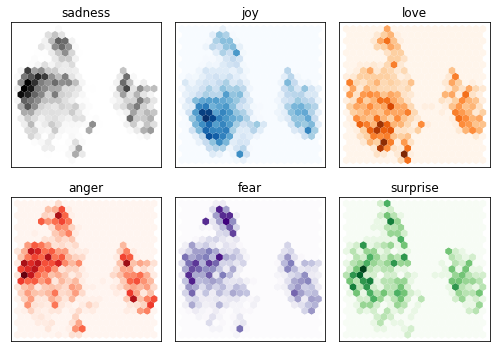

In [86]:
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names

for i, (label, cmap) in enumerate(zip(labels, cmaps)):
    df_emb_sub = df_emb.query(f"label == {i}")
    axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                   gridsize=20, linewidths=(0,))
    axes[i].set_title(label)
    axes[i].set_xticks([]), axes[i].set_yticks([])

plt.tight_layout()
plt.show()

#NOTE
These are only projections onto a lower-dimensional space. Just because some categories overlap does not mean that they are not separable in the original space. Conversely, if they are separable in the projected space they will be separable in the original space.

**From this plot we can see some clear patterns**: the negative feelings such as sadness, anger, and fear all occupy similar regions with slightly varying distributions. On the other hand, joy and love are well separated from the negative emotions and also share a similar space. Finally, surprise is scattered all over the place. Although we may have hoped for some separation, this is in no way guaranteed since the model was not trained to know the difference between these emotions. It only learned them implicitly by guessing the masked words in texts.

Now that we’ve gained some insight into the features of our dataset, let’s finally train a model on it!

Training a simple classifier
We’ve seen that the hidden states are somewhat different between the emotions, although for several of them there is no obvious boundary. Let’s use these hidden states to train a logistic regression model with Scikit-learn. Training such a simple model is fast and does not require a GPU:

In [87]:
from sklearn.linear_model import LogisticRegression

# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

Looking at the accuracy, it might appear that our model is just a bit better than random—but since we are dealing with an unbalanced multiclass dataset, it’s actually significantly better. We can examine whether our model is any good by comparing it against a simple baseline. In Scikit-learn there is a DummyClassifier that can be used to build a classifier with simple heuristics such as always choosing the majority class or always drawing a random class. In this case the best-performing heuristic is to always choose the most frequent class, which yields an accuracy of about 35%:

In [88]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

So, our simple classifier with DistilBERT embeddings is significantly better than our baseline. We can further investigate the performance of the model by looking at the confusion matrix of the classifier, which tells us the relationship between the true and predicted labels:

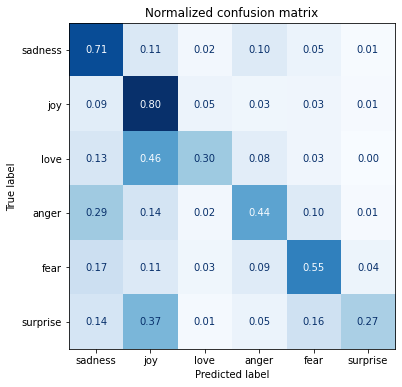

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

We can see that anger and fear are most often confused with sadness, which agrees with the observation we made when visualizing the embeddings. Also, love and surprise are frequently mistaken for joy.

In the next section we will explore the fine-tuning approach, which leads to superior classification performance. It is, however, important to note that doing this requires more computational resources, such as GPUs, that might not be available in your organization. In cases like these, a feature-based approach can be a good compromise between doing traditional machine learning and deep learning.

#Fine-Tuning Transformers
Let’s now explore what it takes to fine-tune a transformer end-to-end. With the fine-tuning approach we do not use the hidden states as fixed features, but instead train them as shown in Figure 2-6. This requires the classification head to be differentiable, which is why this method usually uses a neural network for classification.

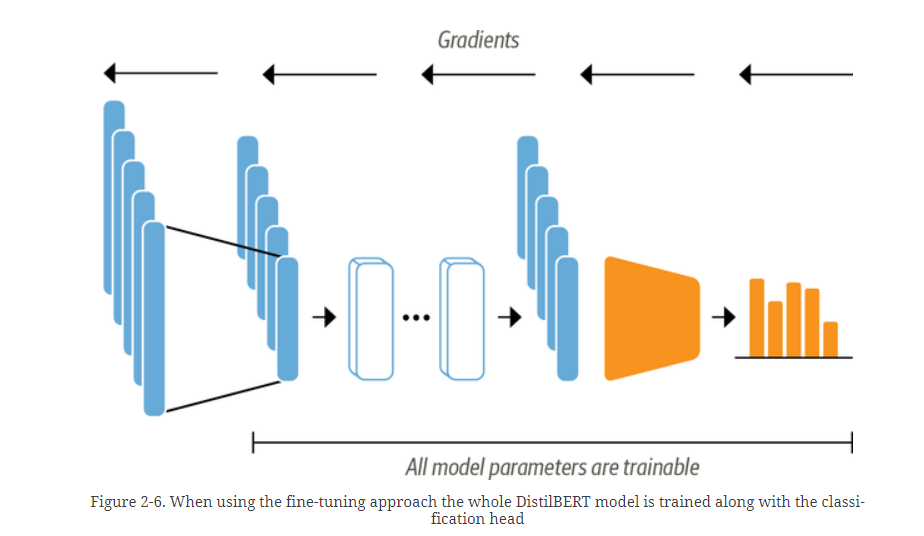

Training the hidden states that serve as inputs to the classification model will help us avoid the problem of working with data that may not be well suited for the classification task. Instead, the initial hidden states adapt during training to decrease the model loss and thus increase its performance.

We’ll be using the Trainer API from nlpt_pin01 Transformers to simplify the training loop. Let’s look at the ingredients we need to set one up!

#Loading a pretrained model
The first thing we need is a pretrained DistilBERT model like the one we used in the feature-based approach. The only slight modification is that we use the AutoModelForSequenceClassification model instead of AutoModel. The difference is that the AutoModelForSequenceClassification model has a classification head on top of the pretrained model outputs, which can be easily trained with the base model. We just need to specify how many labels the model has to predict (six in our case), since this dictates the number of outputs the classification head has:

In [90]:
from transformers import AutoModelForSequenceClassification

num_labels = 6
model = (AutoModelForSequenceClassification
         .from_pretrained(model_ckpt, num_labels=num_labels)
         .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_projector.bias', 'vocab_projector.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier

You will see a warning that some parts of the model are randomly initialized. This is normal since the classification head has not yet been trained. The next step is to define the metrics that we’ll use to evaluate our model’s performance during fine-tuning.

#Defining the performance metrics
To monitor metrics during training, we need to define a compute_metrics() function for the Trainer. This function receives an EvalPrediction object (which is a named tuple with predictions and label_ids attributes) and needs to return a dictionary that maps each metric’s name to its value. For our application, we’ll compute the F1-score and the accuracy of the model as follows:

In [91]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

With the dataset and metrics ready, we just have two final things to take care of before we define the Trainer class:

Log in to our account on the Hugging Face Hub. This will allow us to push our fine-tuned model to our account on the Hub and share it with the community.

Define all the hyperparameters for the training run.

We’ll tackle these steps in the next section.

#Training the model
If you’re running this code in a Jupyter notebook, you can log in to the Hub with the following helper function:

In [92]:
from huggingface_hub import notebook_login

notebook_login()

This will display a widget in which you can enter your username and password, or an access token with write privileges. You can find details on how to create access tokens in the Hub documentation. If you’re working in the terminal, you can log in by running the following command:

In [93]:
!huggingface-cli login


        _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
        _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
        _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
        _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
        _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

        To login, `huggingface_hub` now requires a token generated from https://huggingface.co/settings/token.
        (Deprecated, will be removed in v0.3.0) To login with username and password instead, interrupt with Ctrl+C.
        
Token: 
Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine

To define the training parameters, we use the TrainingArguments class. This class stores a lot of information and gives you fine-grained control over the training and evaluation. The most important argument to specify is output_dir, which is where all the artifacts from training are stored. Here is an example of TrainingArguments in all its glory:

In [94]:
from transformers import Trainer, TrainingArguments

batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy="epoch",
                                  disable_tqdm=False,
                                  logging_steps=logging_steps,
                                  push_to_hub=True,
                                  log_level="error")

In [95]:
!pip install git-lfs

In [98]:
%%capture
!apt install git-lfs

Here we also set the batch size, learning rate, and number of epochs, and specify to load the best model at the end of the training run. With this final ingredient, we can instantiate and fine-tune our model with the Trainer:

In [99]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded["train"],
                  eval_dataset=emotions_encoded["validation"],
                  tokenizer=tokenizer)
trainer.train()


Cloning https://huggingface.co/DrishtiSharma/distilbert-base-uncased-finetuned-emotion into local empty directory.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:309: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.827900,0.310007,0.906000,0.903604
2,0.243000,0.214781,0.927000,0.927187


TrainOutput(global_step=500, training_loss=0.5354724502563477, metrics={'train_runtime': 233.4099, 'train_samples_per_second': 137.098, 'train_steps_per_second': 2.142, 'total_flos': 720342861696000.0, 'train_loss': 0.5354724502563477, 'epoch': 2.0})

Looking at the logs, we can see that our model has an F1-score on the validation set of around 92%—this is a significant improvement over the feature-based approach!

We can take a more detailed look at the training metrics by calculating the confusion matrix. To visualize the confusion matrix, we first need to get the predictions on the validation set. The predict() method of the Trainer class returns several useful objects we can use for evaluation:

In [100]:
preds_output = trainer.predict(emotions_encoded["validation"])

The output of the predict() method is a PredictionOutput object that contains arrays of predictions and label_ids, along with the metrics we passed to the trainer. For example, the metrics on the validation set can be accessed as follows:

In [101]:
preds_output.metrics

{'test_accuracy': 0.927,
 'test_f1': 0.927187407165913,
 'test_loss': 0.21478119492530823,
 'test_runtime': 4.6478,
 'test_samples_per_second': 430.312,
 'test_steps_per_second': 6.885}

It also contains the raw predictions for each class. We can decode the predictions greedily using np.argmax(). This yields the predicted labels and has the same format as the labels returned by the Scikit-learn models in the feature-based approach:

In [102]:
y_preds = np.argmax(preds_output.predictions, axis=1)

With the predictions, we can plot the confusion matrix again:

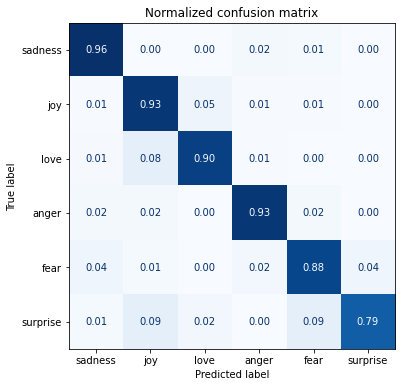

In [103]:
plot_confusion_matrix(y_preds, y_valid, labels)

This is much closer to the ideal diagonal confusion matrix. The love category is still often confused with joy, which seems natural. surprise is also frequently mistaken for joy, or confused with fear. Overall the performance of the model seems quite good, but before we call it a day, let’s dive a little deeper into the types of errors our model is likely to make.

#FINE-TUNING WITH KERAS
If you are using TensorFlow, it’s also possible to fine-tune your models using the Keras API. The main difference from the PyTorch API is that there is no Trainer class, since Keras models already provide a built-in fit() method. To see how this works, let’s first load DistilBERT as a TensorFlow model:

In [117]:
from transformers import TFAutoModelForSequenceClassification

tf_model = (TFAutoModelForSequenceClassification
            .from_pretrained(model_ckpt, num_labels=num_labels))

Next, we’ll convert our datasets into the tf.data.Dataset format. Because we have already padded our tokenized inputs, we can do this conversion easily by applying the to_tf_dataset() method to emotions_encoded:

In [118]:
# The column names to convert to TensorFlow tensors
tokenizer_columns = tokenizer.model_input_names

tf_train_dataset = emotions_encoded["train"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=True,
    batch_size=batch_size)
tf_eval_dataset = emotions_encoded["validation"].to_tf_dataset(
    columns=tokenizer_columns, label_cols=["label"], shuffle=False,
    batch_size=batch_size)

TypeError: ignored

Here we’ve also shuffled the training set, and defined the batch size for it and the validation set. The last thing to do is compile and train the model:

In [107]:
import tensorflow as tf

tf_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=tf.metrics.SparseCategoricalAccuracy())

tf_model.fit(tf_train_dataset, validation_data=tf_eval_dataset, epochs=2)

NameError: ignored

#Error analysis
Before moving on, we should investigate our model’s predictions a little bit further. A simple yet powerful technique is to sort the validation samples by the model loss. When we pass the label during the forward pass, the loss is automatically calculated and returned. Here’s a function that returns the loss along with the predicted label:

In [108]:
from torch.nn.functional import cross_entropy

def forward_pass_with_label(batch):
    # Place all input tensors on the same device as the model
    inputs = {k:v.to(device) for k,v in batch.items()
              if k in tokenizer.model_input_names}

    with torch.no_grad():
        output = model(**inputs)
        pred_label = torch.argmax(output.logits, axis=-1)
        loss = cross_entropy(output.logits, batch["label"].to(device),
                             reduction="none")
    # Place outputs on CPU for compatibility with other dataset columns
    return {"loss": loss.cpu().numpy(),
            "predicted_label": pred_label.cpu().numpy()}

Using the map() method once more, we can apply this function to get the losses for all the samples:

In [109]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                            columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
    forward_pass_with_label, batched=True, batch_size=16)

  0%|          | 0/125 [00:00<?, ?ba/s]

Finally, we create a DataFrame with the texts, losses, and predicted/true labels:

In [110]:
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
                              .apply(label_int2str))

We can now easily sort emotions_encoded by the losses in either ascending or descending order. The goal of this exercise is to detect one of the following:

**Wrong labels**
Every process that adds labels to data can be flawed. Annotators can make mistakes or disagree, while labels that are inferred from other features can be wrong. If it was easy to automatically annotate data, then we would not need a model to do it. Thus, it is normal that there are some wrongly labeled examples. With this approach, we can quickly find and correct them.

**Quirks of the dataset**
Datasets in the real world are always a bit messy. When working with text, special characters or strings in the inputs can have a big impact on the model’s predictions. Inspecting the model’s weakest predictions can help identify such features, and cleaning the data or injecting similar examples can make the model more robust.

Let’s first have a look at the data samples with the highest losses:

In [111]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.748172
1801,i feel that he was being overshadowed by the s...,love,sadness,5.730503
1274,i am going to several holiday parties and i ca...,joy,sadness,5.404534
1963,i called myself pro life and voted for perry w...,joy,sadness,5.396124
1950,i as representative of everything thats wrong ...,surprise,sadness,5.144376
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.090647
1500,i guess we would naturally feel a sense of lon...,anger,sadness,4.990780
765,i feel super awkward and out of place right now,joy,sadness,4.983192
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.886578
1509,i guess this is a memoir so it feels like that...,joy,fear,4.624744


We can clearly see that the model predicted some of the labels incorrectly. On the other hand, it seems that there are quite a few examples with no clear class, which might be either mislabeled or require a new class altogether. In particular, joy seems to be mislabeled several times. With this information we can refine the dataset, which often can lead to as big a performance gain (or more) as having more data or larger models!

When looking at the samples with the lowest losses, we observe that the model seems to be most confident when predicting the sadness class. Deep learning models are exceptionally good at finding and exploiting shortcuts to get to a prediction. For this reason, it is also worth investing time into looking at the examples that the model is most confident about, so that we can be confident that the model does not improperly exploit certain features of the text. So, let’s also look at the predictions with the smallest loss:

In [112]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1601,i feel so ungrateful when thinking saying thes...,sadness,sadness,0.015749
1140,i do think about certain people i feel a bit d...,sadness,sadness,0.015763
1368,i started this blog with pure intentions i mus...,sadness,sadness,0.015968
69,i have no extra money im worried all of the ti...,sadness,sadness,0.015982
1152,i feel pathetic because i shouldn t complain a...,sadness,sadness,0.016118
21,i feel try to tell me im ungrateful tell me im...,sadness,sadness,0.016189
1303,i feel pathetic and uninspired,sadness,sadness,0.016223
133,i and feel quite ungrateful for it but i m loo...,sadness,sadness,0.016242
1502,i feel ungrateful for stupid shit like,sadness,sadness,0.016320
1965,i started feeling pathetic and ashamed,sadness,sadness,0.016380


We now know that the joy is sometimes mislabeled and that the model is most confident about predicting the label sadness. With this information we can make targeted improvements to our dataset, and also keep an eye on the class the model seems to be very confident about.

The last step before serving the trained model is to save it for later usage. nlpt_pin01 Transformers allows us to do this in a few steps, which we’ll show you in the next section.

#Saving and sharing the model
The NLP community benefits greatly from sharing pretrained and fine-tuned models, and everybody can share their models with others via the Hugging Face Hub. Any community-generated model can be downloaded from the Hub just like we downloaded the DistilBERT model. With the Trainer API, saving and sharing a model is simple:

In [113]:
trainer.push_to_hub(commit_message="Training completed!")

Several commits (2) will be pushed upstream.
The progress bars may be unreliable.


Upload file runs/Mar05_05-58-59_d3c3c28cbd7c/events.out.tfevents.1646460026.d3c3c28cbd7c.77.0:  70%|######9   …

To https://huggingface.co/DrishtiSharma/distilbert-base-uncased-finetuned-emotion
   d4f1e32..fe3eb73  main -> main



TypeError: ignored

We can also use the fine-tuned model to make predictions on new tweets. Since we’ve pushed our model to the Hub, we can now use it with the pipeline() function, just like we did in Chapter 1. First, let’s load the pipeline:

In [114]:
from transformers import pipeline

# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

Downloading:   0%|          | 0.00/883 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Then let’s test the pipeline with a sample tweet:

In [115]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

Finally, we can plot the probability for each class in a bar plot. Clearly, the model estimates that the most likely class is joy, which appears to be reasonable given the tweet:

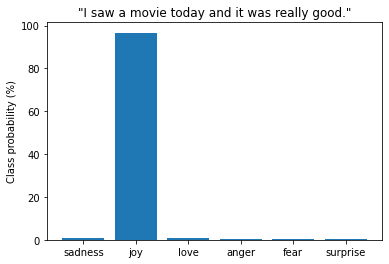

In [116]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()

#Conclusion
Congratulations, you now know how to train a transformer model to classify the emotions in tweets! We have seen two complementary approaches based on features and fine-tuning, and investigated their strengths and weaknesses.

However, this is just the first step in building a real-world application with transformer models, and we have a lot more ground to cover. Here’s a list of challenges you’re likely to experience in your NLP journey:

>My boss wants my model in production yesterday!
In most applications, your model doesn’t just sit somewhere gathering dust—you want to make sure it’s serving predictions! When a model is pushed to the Hub, an inference endpoint is automatically created that can be called with HTTP requests. We recommend checking out the documentation of the Inference API if you want to learn more.

>My users want faster predictions!
We’ve already seen one approach to this problem: using DistilBERT. In Chapter 8 we’ll dive into knowledge distillation (the process by which DistilBERT was created), along with other tricks to speed up your transformer models.

>Can your model also do X?
As we’ve alluded to in this chapter, transformers are extremely versatile. In the rest of the book we will be exploring a range of tasks, like question answering and named entity recognition, all using the same basic architecture.

>None of my texts are in English!
It turns out that transformers also come in a multilingual variety, and we’ll use them in Chapter 4 to tackle several languages at once.

>I don’t have any labels!
If there is very little labeled data available, fine-tuning may not be an option. In Chapter 9, we’ll explore some techniques to deal with this situation.

Now that we’ve seen what’s involved in training and sharing a transformer, in the next chapter we’ll explore implementing our very own transformer model from scratch.

1 V. Sanh et al., “DistilBERT, a Distilled Version of BERT: Smaller, Faster, Cheaper and Lighter”, (2019).

2 Optimus Prime is the leader of a race of robots in the popular Transformers franchise for children (and for those who are young at heart!).

3 E. Saravia et al., “CARER: Contextualized Affect Representations for Emotion Recognition,” Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (Oct–Nov 2018): 3687–3697, http://dx.doi.org/10.18653/v1/D18-1404.

4 GPT-2 is the successor of GPT, and it captivated the public’s attention with its impressive ability to generate realistic text. We’ll explore GPT-2 in detail in Chapter 6.

5 M. Schuster and K. Nakajima, “Japanese and Korean Voice Search,” 2012 IEEE International Conference on Acoustics, Speech and Signal Processing (2012): 5149–5152, https://doi.org/10.1109/ICASSP.2012.6289079.

6 In the case of DistilBERT, it’s guessing the masked tokens.

7 L. McInnes, J. Healy, and J. Melville, “UMAP: Uniform Manifold Approximation and Projection for Dimension Reduction”, (2018).